In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel('Linear Regression.xlsx')
print(data.head())
print(data.isna().sum())

    price  sqft_living  bedrooms  bathrooms  floors
0  221900         1180         3       1.00     1.0
1  538000         2570         3       2.25     2.0
2  180000          770         2       1.00     1.0
3  604000         1960         4       3.00     1.0
4  510000         1680         3       2.00     1.0
price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64


In [ ]:
print(data.describe())

              price   sqft_living      bedrooms     bathrooms        floors
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000
mean   5.400881e+05   2079.899736      3.370842      2.114757      1.494309
std    3.671272e+05    918.440897      0.930062      0.770163      0.539989
min    7.500000e+04    290.000000      0.000000      0.000000      1.000000
25%    3.219500e+05   1427.000000      3.000000      1.750000      1.000000
50%    4.500000e+05   1910.000000      3.000000      2.250000      1.500000
75%    6.450000e+05   2550.000000      4.000000      2.500000      2.000000
max    7.700000e+06  13540.000000     33.000000      8.000000      3.500000


In [ ]:
x=data.iloc[:,1].values
y=data.iloc[:,0].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(np.array(x),np.array(y),test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)

(17290,)
(17290,)


In [ ]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(17290, 1)
(17290, 1)


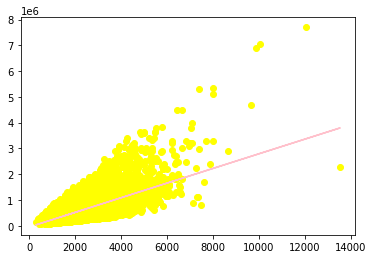

In [ ]:
plt.scatter(x_train, y_train, color='yellow' )
plt.plot(x_train, lin_reg.predict(x_train), color='pink')

In [ ]:
y_pred=lin_reg.predict(x_train)
print(y_pred)

[[397573.57161207]
 [457206.96865933]
 [261268.66407547]
 ...
 [621908.73193273]
 [624748.41750641]
 [627588.10308009]]


# ***ATTRITION DATASET***

In [ ]:
import pandas as pd
file=pd.read_csv('general_data.csv')

In [ ]:
col_list=['MonthlyIncome', 'Age', 'EmployeeID', 'TotalWorkingYears', 'YearsAtCompany', 'YearsAtCompany'  ]
dt=file[file.columns[file.columns.isin(col_list)]]
dt.head()

,Age,EmployeeID,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,51,1,131160,1.0,1
1,31,2,41890,6.0,5
2,32,3,193280,5.0,5
3,38,4,83210,13.0,8
4,32,5,23420,9.0,6


In [ ]:
dt.isna().sum()

Age                  0
EmployeeID           0
MonthlyIncome        0
TotalWorkingYears    9
YearsAtCompany       0
dtype: int64

In [ ]:
dg=dt.fillna(method='ffill')
dg.isna().sum()


Age                  0
EmployeeID           0
MonthlyIncome        0
TotalWorkingYears    0
YearsAtCompany       0
dtype: int64

In [ ]:
x=dg.iloc[:, [0, 1, 3, 4]]
y=dg.iloc[:, 2:3]
x

,Age,EmployeeID,TotalWorkingYears,YearsAtCompany
0,51,1,1.0,1
1,31,2,6.0,5
2,32,3,5.0,5
3,38,4,13.0,8
4,32,5,9.0,6
...,...,...,...,...
4405,42,4406,10.0,3
4406,29,4407,10.0,3
4407,25,4408,5.0,4
4408,42,4409,10.0,9


In [ ]:
print(x.shape)
print(y.shape)

(4410, 4)
(4410, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr.predict(x_test)
print(y_pred)

[[66931.03359041]
 [65649.49737882]
 [60142.46853539]
 ...
 [64644.29741292]
 [61644.27037152]
 [57874.38972563]]


In [163]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE =', RMSE)
print('mean_squared_error =' , mean_squared_error(y_test, y_pred))
print('r2_score =', r2_score(y_test, y_pred))

RMSE = 48307.91976457547
mean_squared_error = 2333655111.9806614
r2_score = -0.0037209153477637535


In [165]:
unseen_pred=lr.predict([[30, 5, 10, 5]])
print(unseen_pred)

[[64672.06706383]]
